# Flights Capstone Two: EDA

## By Morgan Snellgrove

We are interested in predicting ticket price using most of the other features in the dataset. Right now, price is given in two columns: 'price' and 'price_usd'. Since the values in US dollars will be more meaningful, I will use the column 'price_usd' as the target feature. 

Before starting, I suspect the following features will be useful explanatory variables: 'date', 'airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', and 'days_left'. 


Questions/Thoughts to explore:

1) Do any of the numeric variables have correlation with 'price_usd'?

2) For each catagorical variable, what is the most common/popular value?

3) What source/destination combos are most popular? 

4) What is the average price for each source/destination combo?

5) For each airline, what source/destination combos do they offer? 

6) Do all airlines have both economy and business tickets? 

7) Are the dates evenly distributed? Are there any holidays during the time period represented? 

8) Are ticket prices different on Weekdays vs. Weekends?

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

### Read dataframe and drop 'Unnamed:0'

In [2]:
flights = pd.read_csv('final_clean_flight_dataset.csv', parse_dates = ['date'])

In [3]:
flights.head()

,Unnamed: 0,date,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,duration_hours,duration_minutes,days_left,price
0,0,2022-02-11,SpiceJet,SG-8709,Delhi,18:55:00,0,21:05:00,Mumbai,economy,2.17,2,10,1,5953
1,1,2022-02-11,SpiceJet,SG-8157,Delhi,06:20:00,0,08:40:00,Mumbai,economy,2.33,2,20,1,5953
2,2,2022-02-11,AirAsia,I5-764,Delhi,04:25:00,0,06:35:00,Mumbai,economy,2.17,2,10,1,5956
3,3,2022-02-11,Vistara,UK-995,Delhi,10:20:00,0,12:35:00,Mumbai,economy,2.25,2,15,1,5955
4,4,2022-02-11,Vistara,UK-963,Delhi,08:50:00,0,11:10:00,Mumbai,economy,2.33,2,20,1,5955


In [4]:
flights.drop(columns = 'Unnamed: 0', inplace = True)

In [5]:
flights.head()

,date,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,duration_hours,duration_minutes,days_left,price
0,2022-02-11,SpiceJet,SG-8709,Delhi,18:55:00,0,21:05:00,Mumbai,economy,2.17,2,10,1,5953
1,2022-02-11,SpiceJet,SG-8157,Delhi,06:20:00,0,08:40:00,Mumbai,economy,2.33,2,20,1,5953
2,2022-02-11,AirAsia,I5-764,Delhi,04:25:00,0,06:35:00,Mumbai,economy,2.17,2,10,1,5956
3,2022-02-11,Vistara,UK-995,Delhi,10:20:00,0,12:35:00,Mumbai,economy,2.25,2,15,1,5955
4,2022-02-11,Vistara,UK-963,Delhi,08:50:00,0,11:10:00,Mumbai,economy,2.33,2,20,1,5955


### Add column with price in US dollars. New column called 'price_usd'.

In [6]:
flights['price_usd'] = round(flights['price'] * 0.0122284, 2)

In [7]:
flights.head()

,date,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,duration_hours,duration_minutes,days_left,price,price_usd
0,2022-02-11,SpiceJet,SG-8709,Delhi,18:55:00,0,21:05:00,Mumbai,economy,2.17,2,10,1,5953,72.80
1,2022-02-11,SpiceJet,SG-8157,Delhi,06:20:00,0,08:40:00,Mumbai,economy,2.33,2,20,1,5953,72.80
2,2022-02-11,AirAsia,I5-764,Delhi,04:25:00,0,06:35:00,Mumbai,economy,2.17,2,10,1,5956,72.83
3,2022-02-11,Vistara,UK-995,Delhi,10:20:00,0,12:35:00,Mumbai,economy,2.25,2,15,1,5955,72.82
4,2022-02-11,Vistara,UK-963,Delhi,08:50:00,0,11:10:00,Mumbai,economy,2.33,2,20,1,5955,72.82


### Double checking datatypes

In [8]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   date              300261 non-null  datetime64[ns]
 1   airline           300261 non-null  object        
 2   flight            300261 non-null  object        
 3   source_city       300261 non-null  object        
 4   departure_time    300261 non-null  object        
 5   stops             300261 non-null  int64         
 6   arrival_time      300261 non-null  object        
 7   destination_city  300261 non-null  object        
 8   class             300261 non-null  object        
 9   duration          300261 non-null  float64       
 10  duration_hours    300261 non-null  int64         
 11  duration_minutes  300261 non-null  int64         
 12  days_left         300261 non-null  int64         
 13  price             300261 non-null  int64         
 14  pric

### Checking pairplot of dataset to see if there appears to be any correlation.

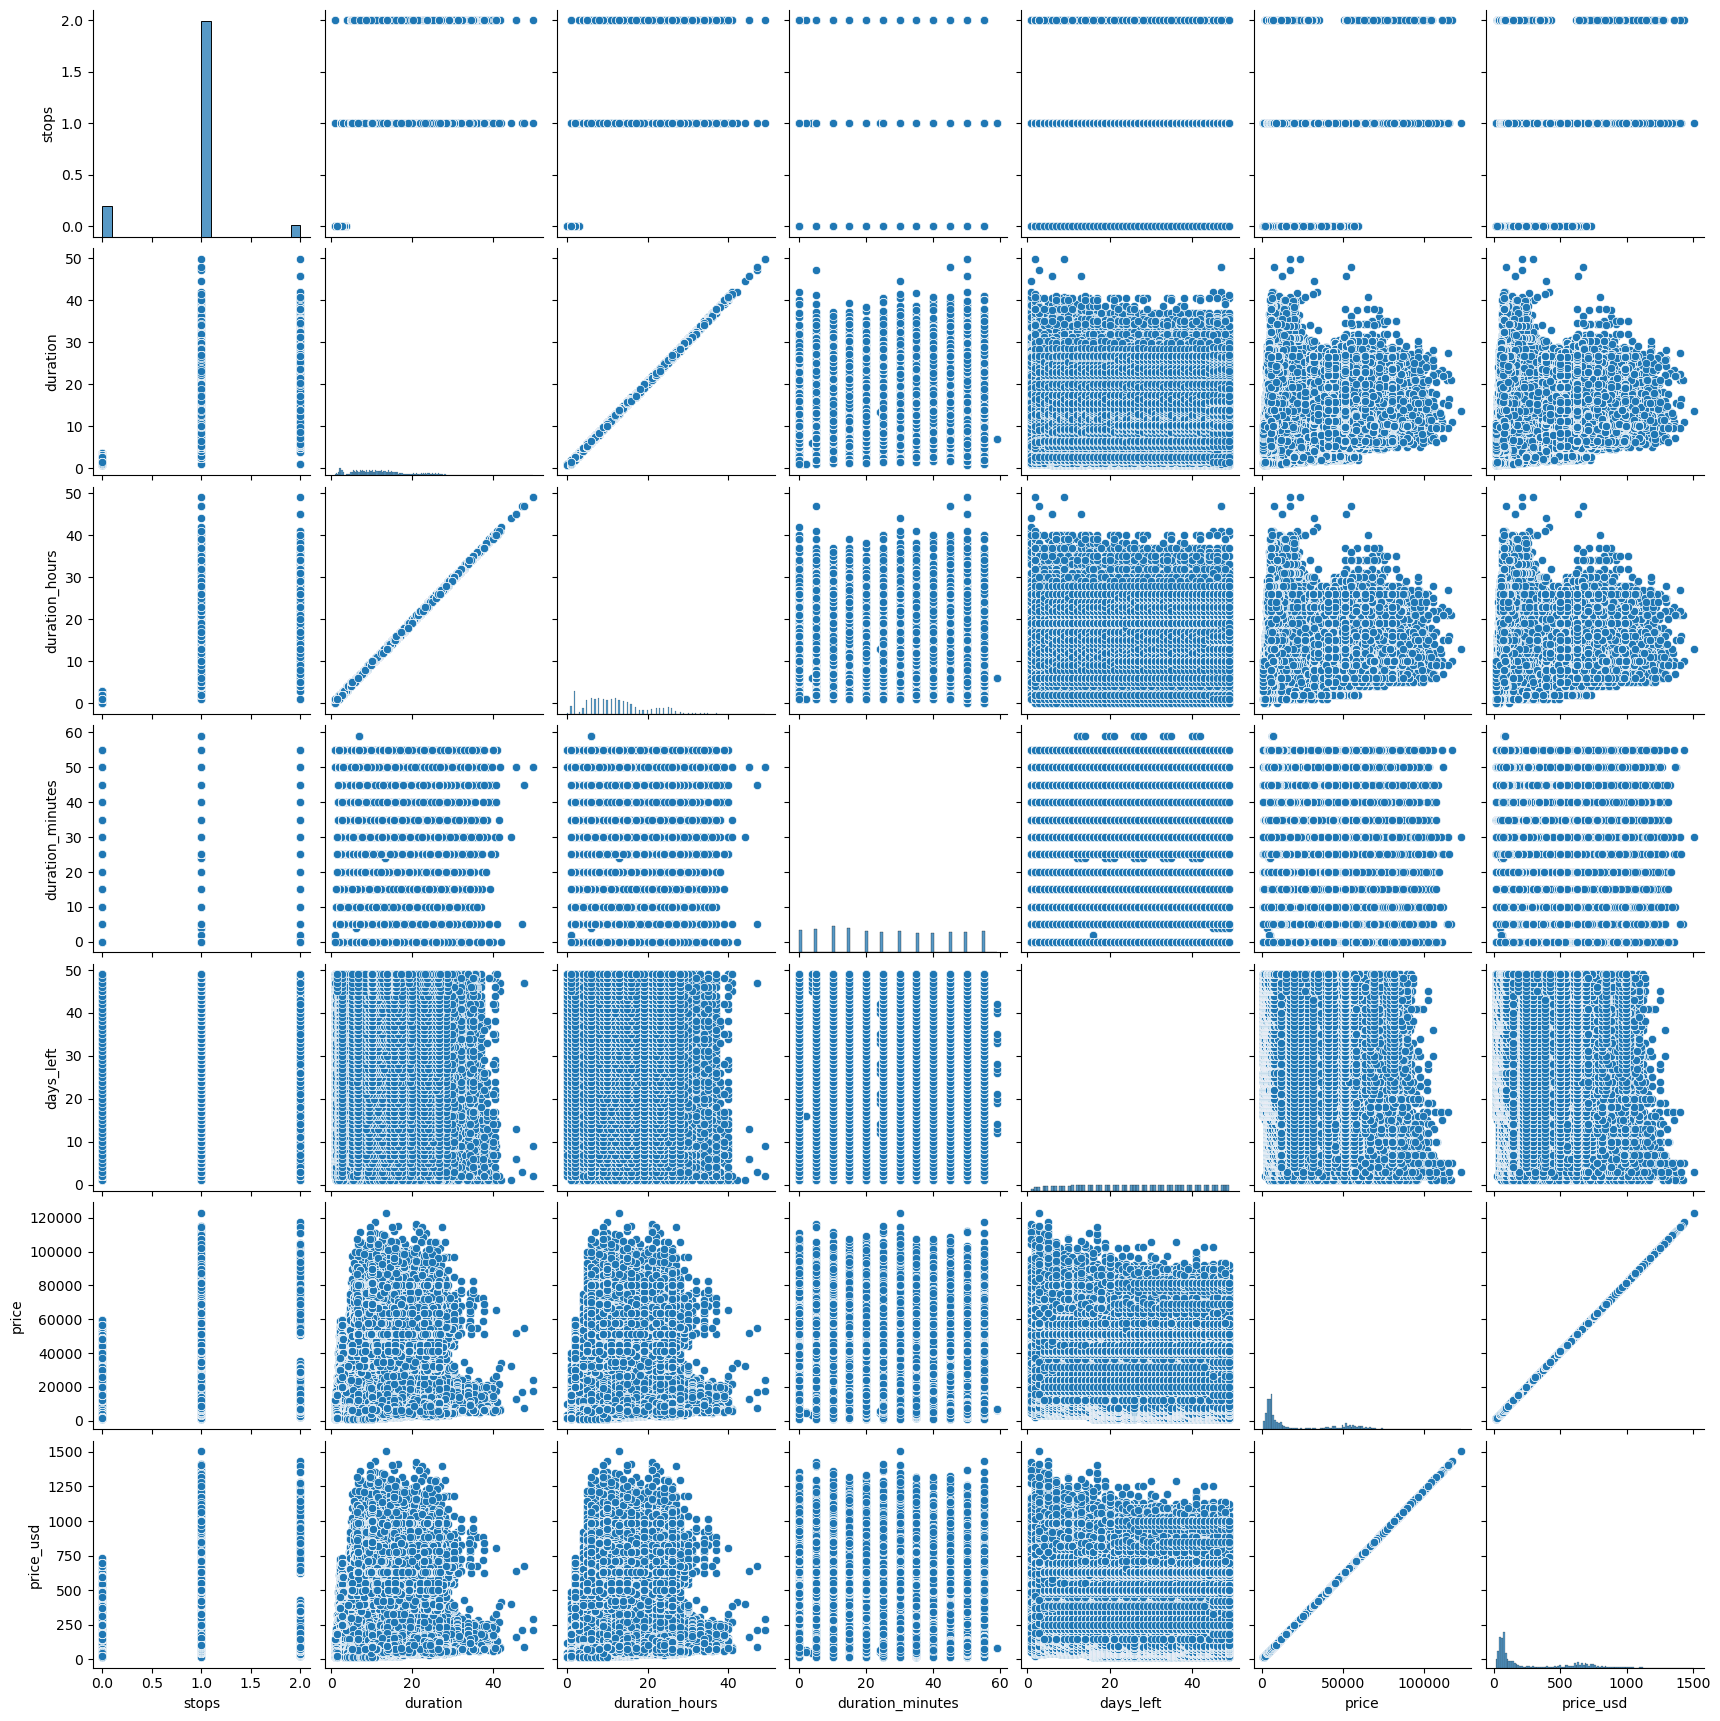

In [9]:
sns.pairplot(flights);

None of the scatterplots look useful... We have a lot of discrete variables. The pair plots involving continuous variables do not show much correlation at all. 

Observations:

'stops': Most flights had 1 stop. Looking at 'stops' with our target variable, the most expensive flights appear to have 1 or 2 stops. Perhaps the non-stop flights were shorter trips?

'day_left': The most expensive flights were purchased with fewer days left. 


### Looking at Categorical variables: 'airline', 'source_city', 'destination_city', and 'class'

First looking at countplots to see what value is most popular for each variable. 

Number 1 'airline' = Vistara

Number 1 'source_city' = Delhi

Number 1 'destination_city' = Mumbai

Number 1 ' class' = economy 


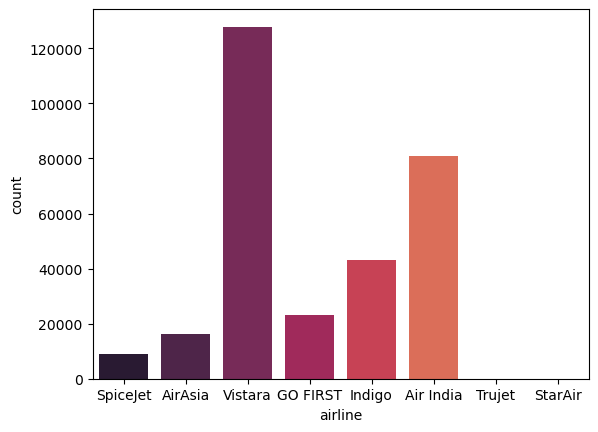

In [10]:
_= sns.countplot(x = 'airline', data = flights, palette = 'rocket')

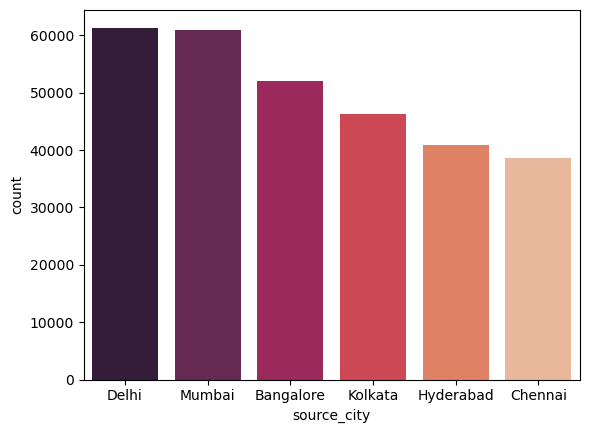

In [11]:
_= sns.countplot(x = 'source_city', data = flights, palette = 'rocket')

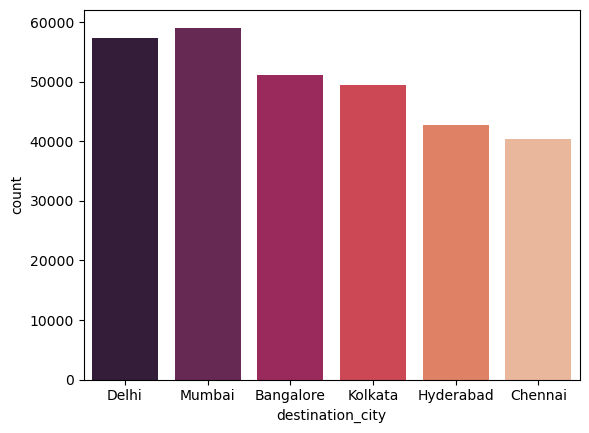

In [12]:
_= sns.countplot(x = 'destination_city', data = flights, order = ['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'], palette = 'rocket')

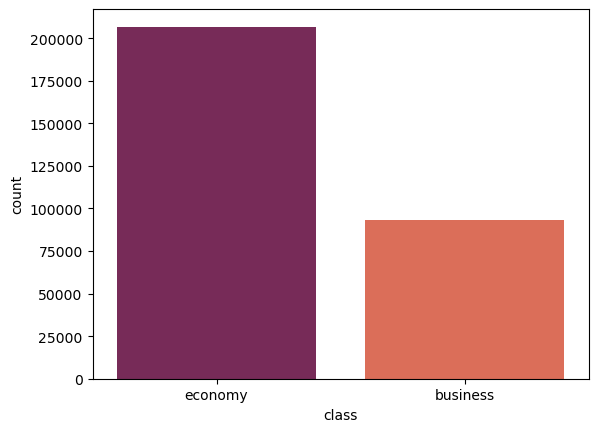

In [13]:
_= sns.countplot(x = 'class', data = flights, palette = 'rocket')

### I was curious to see what combination of source and destination city was most common as well as the average price. 

I created a new dataframe called from_to_flights to hold these combos. The most common flights were:

Delhi to Mumbai and 
Mumbai to Delhi

This is not surprising since those are very large cities in India.

Since these were the most popular from_to combos, I then wondered if they had a cheaper average ticket price. To investigate this, I added in the 'price_usd' from our flights dataframe and then grouped by 'from_to' and calculated the mean. 

These combos do appear lower in the list of average price. Delhi to Mumbai is at index 23 with an average ticket price of 236.67 and Mumbai to Delhi is even lower at index 25 with an average ticket price of 228.98.

In [14]:
from_to_flights = pd.DataFrame(zip(flights['source_city'], flights['destination_city']))

In [15]:
from_to_flights.head()

,0,1
0,Delhi,Mumbai
1,Delhi,Mumbai
2,Delhi,Mumbai
3,Delhi,Mumbai
4,Delhi,Mumbai


In [16]:
from_to_flights['from_to'] = from_to_flights[0]+ ', ' + from_to_flights[1] 

In [17]:
from_to_flights.head()

,0,1,from_to
0,Delhi,Mumbai,"Delhi, Mumbai"
1,Delhi,Mumbai,"Delhi, Mumbai"
2,Delhi,Mumbai,"Delhi, Mumbai"
3,Delhi,Mumbai,"Delhi, Mumbai"
4,Delhi,Mumbai,"Delhi, Mumbai"


In [18]:
from_to_flights.value_counts('from_to')

from_to
Delhi, Mumbai           15291
Mumbai, Delhi           14809
Delhi, Bangalore        14012
Bangalore, Delhi        13756
Bangalore, Mumbai       12940
Mumbai, Bangalore       12885
Mumbai, Kolkata         12602
Delhi, Kolkata          11934
Kolkata, Mumbai         11467
Delhi, Chennai          10780
Kolkata, Delhi          10506
Mumbai, Hyderabad       10477
Mumbai, Chennai         10130
Hyderabad, Mumbai       10073
Bangalore, Kolkata      10029
Kolkata, Bangalore       9824
Chennai, Delhi           9783
Chennai, Mumbai          9338
Delhi, Hyderabad         9328
Bangalore, Hyderabad     8971
Hyderabad, Delhi         8507
Hyderabad, Kolkata       7987
Hyderabad, Bangalore     7898
Kolkata, Hyderabad       7897
Chennai, Kolkata         6983
Kolkata, Chennai         6653
Chennai, Bangalore       6493
Bangalore, Chennai       6410
Hyderabad, Chennai       6395
Chennai, Hyderabad       6103
dtype: int64

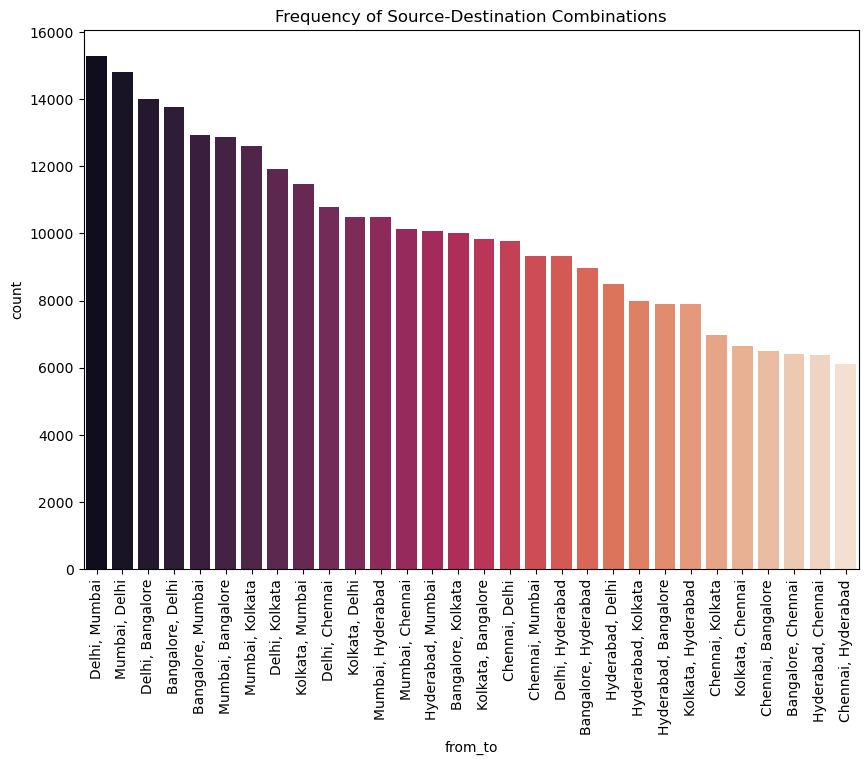

In [19]:
plt.subplots(figsize = (10, 7))
sns.countplot(x='from_to', data = from_to_flights, order = from_to_flights['from_to'].value_counts().index, palette = 'rocket')
plt.title('Frequency of Source-Destination Combinations')
plt.xticks(rotation=90);

In [20]:
from_to_flights['price_usd'] = flights['price_usd']

In [21]:
from_to_flights.head()

,0,1,from_to,price_usd
0,Delhi,Mumbai,"Delhi, Mumbai",72.80
1,Delhi,Mumbai,"Delhi, Mumbai",72.80
2,Delhi,Mumbai,"Delhi, Mumbai",72.83
3,Delhi,Mumbai,"Delhi, Mumbai",72.82
4,Delhi,Mumbai,"Delhi, Mumbai",72.82


In [22]:
from_to_flights.shape

(300261, 4)

In [23]:
from_to_avg_price = from_to_flights.groupby('from_to').mean().sort_values(by = 'price_usd', ascending = False)
from_to_avg_price.rename(columns = {'price_usd':'avg_price_usd'}, inplace = True)
from_to_avg_price.reset_index()

/var/folders/mw/tgvznz1d6xbdcgxt0rkwdh540000gn/T/ipykernel_24168/2215172338.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  from_to_avg_price = from_to_flights.groupby('from_to').mean().sort_values(by = 'price_usd', ascending = False)


,from_to,avg_price_usd
0,"Chennai, Bangalore",306.710973
1,"Kolkata, Chennai",289.328171
2,"Bangalore, Kolkata",287.346504
3,"Bangalore, Chennai",285.188590
4,"Mumbai, Bangalore",283.060685
5,"Bangalore, Mumbai",282.809415
6,"Mumbai, Chennai",278.585976
7,"Chennai, Mumbai",278.389900
8,"Kolkata, Bangalore",278.132251
9,"Chennai, Kolkata",277.217306


In [24]:
from_to_avg_price

,avg_price_usd
from_to,
"Chennai, Bangalore",306.710973
"Kolkata, Chennai",289.328171
"Bangalore, Kolkata",287.346504
"Bangalore, Chennai",285.188590
"Mumbai, Bangalore",283.060685
"Bangalore, Mumbai",282.809415
"Mumbai, Chennai",278.585976
"Chennai, Mumbai",278.389900
"Kolkata, Bangalore",278.132251


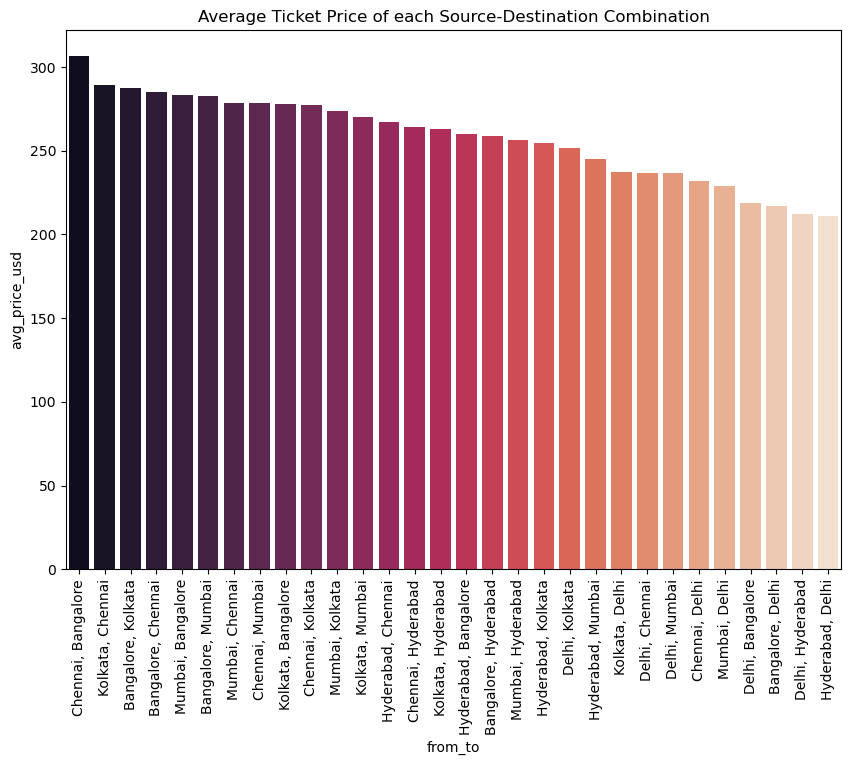

In [25]:
plt.subplots(figsize = (10, 7))
sns.barplot(x = from_to_avg_price.index, y = 'avg_price_usd', data = from_to_avg_price, palette = 'rocket')
plt.title('Average Ticket Price of each Source-Destination Combination')
plt.xticks(rotation=90);

### What are the average ticket prices grouped by airline? Is the most popular airline cheaper on average? 

The most popular airline is Vistara. Now, let's groupby airline and calculate the average ticket price. 

In [26]:
airline = flights.groupby('airline').mean().sort_values(by = 'price_usd', ascending = False)
airline

/var/folders/mw/tgvznz1d6xbdcgxt0rkwdh540000gn/T/ipykernel_24168/234614440.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  airline = flights.groupby('airline').mean().sort_values(by = 'price_usd', ascending = False)


,stops,duration,duration_hours,duration_minutes,days_left,price,price_usd
airline,,,,,,,
Vistara,0.969951,13.326634,12.899796,25.609891,25.894532,30396.536302,371.700977
Air India,0.963780,15.504344,15.051314,27.178901,25.497268,23506.647217,287.448721
SpiceJet,0.726778,12.579767,12.120519,27.538564,24.122850,6179.278881,75.563205
GO FIRST,0.878500,8.754045,8.293524,27.635587,27.428399,5651.930578,69.114186
Indigo,0.757004,5.795197,5.349235,26.755334,26.264309,5324.216303,65.106727
StarAir,0.344262,2.430820,2.377049,3.360656,26.852459,4932.655738,60.317377
AirAsia,0.988322,8.941714,8.477326,27.849733,27.735184,4091.072742,50.027925
Trujet,1.000000,3.869268,3.439024,25.731707,24.121951,3244.634146,39.676098


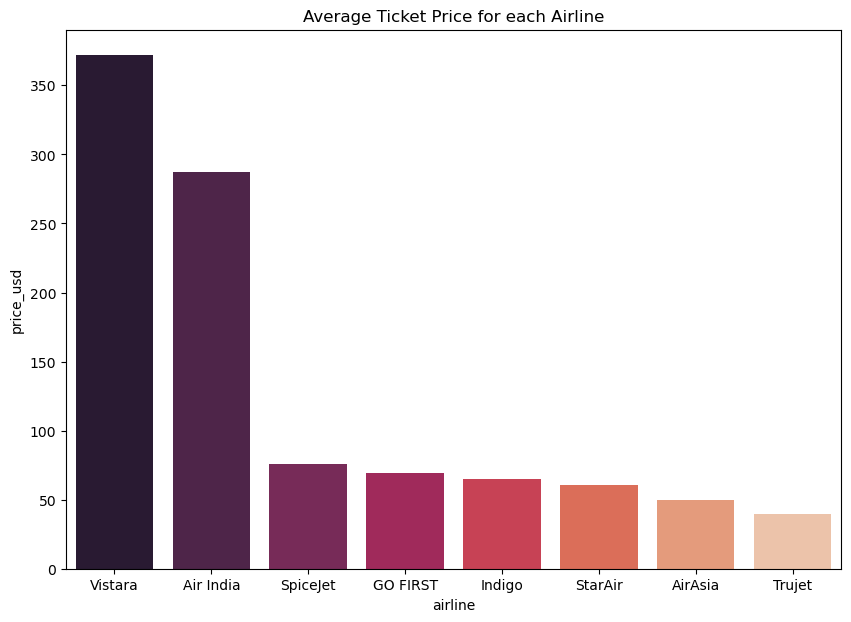

In [27]:
plt.subplots(figsize = (10, 7))
sns.barplot(x = airline.index, y = 'price_usd', data = airline, palette = 'rocket')
plt.title('Average Ticket Price for each Airline');

No, Vistara is actually the most expensive average price. Perhaps they just offer more flights and are sometimes the only option? 

Also, there is a pretty big jump between the average prices of the two most expensive airlines and the rest of the airlines. Starting at number 3, SpiceJet, and going down, all of the average prices are below 100 usd. 

The average days left look pretty similar among all of the airlines.

Average duration is also similar except for StarAir. They have the lowest avg duration and the lowest avg number of stops. 

Trujet appears to always have 1 stop.

Let's add the airline column into our from_to_flights dataframe and see where the top 3 airlines go as well as Trujet. 

In [28]:
from_to_flights['airline'] = flights['airline']
from_to_flights['class'] = flights['class']
from_to_flights.head()

,0,1,from_to,price_usd,airline,class
0,Delhi,Mumbai,"Delhi, Mumbai",72.80,SpiceJet,economy
1,Delhi,Mumbai,"Delhi, Mumbai",72.80,SpiceJet,economy
2,Delhi,Mumbai,"Delhi, Mumbai",72.83,AirAsia,economy
3,Delhi,Mumbai,"Delhi, Mumbai",72.82,Vistara,economy
4,Delhi,Mumbai,"Delhi, Mumbai",72.82,Vistara,economy


### Looking at Vistara:

In [29]:
from_to_Vistara = from_to_flights[from_to_flights['airline'] == 'Vistara']

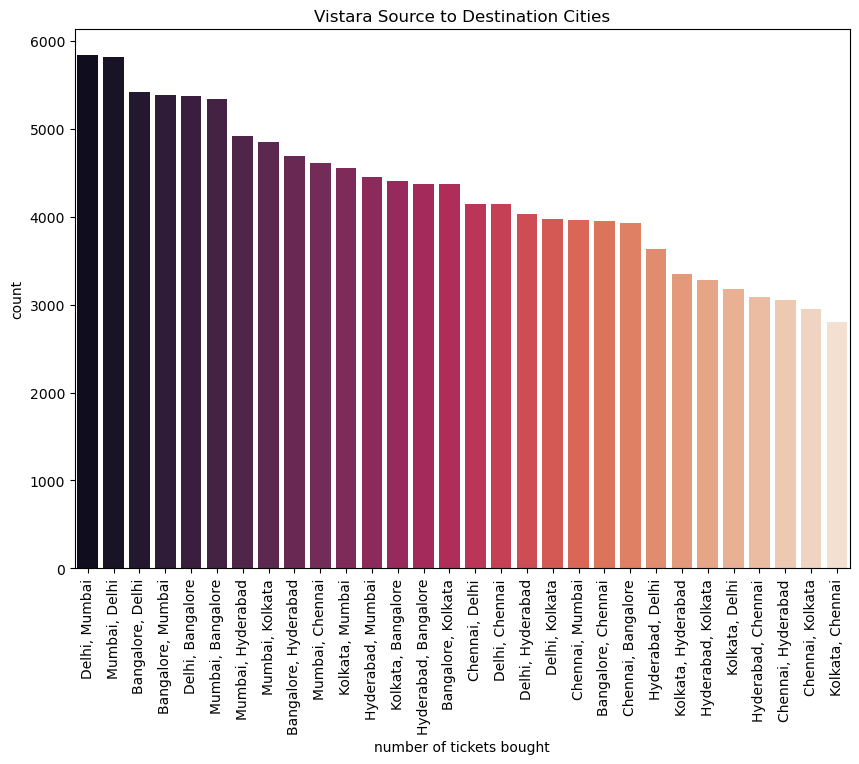

In [30]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = 'from_to', data = from_to_Vistara, order = from_to_Vistara['from_to'].value_counts().index, palette = 'rocket')
ax.set_title('Vistara Source to Destination Cities')
ax.set_xlabel('number of tickets bought')
plt.xticks(rotation = 90);

### Looking at Air India:

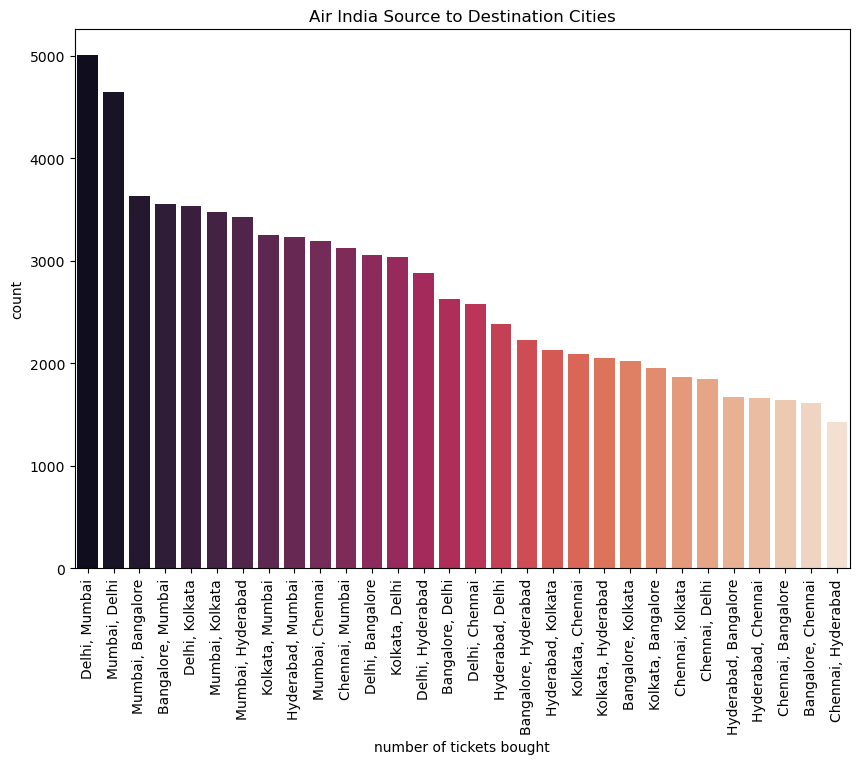

In [31]:
from_to_AirIndia = from_to_flights[from_to_flights['airline'] == 'Air India']
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = 'from_to', data = from_to_AirIndia, order = from_to_AirIndia['from_to'].value_counts().index, palette = 'rocket')
ax.set_title('Air India Source to Destination Cities')
ax.set_xlabel('number of tickets bought')
plt.xticks(rotation = 90);

### Looking at Spice Jet:

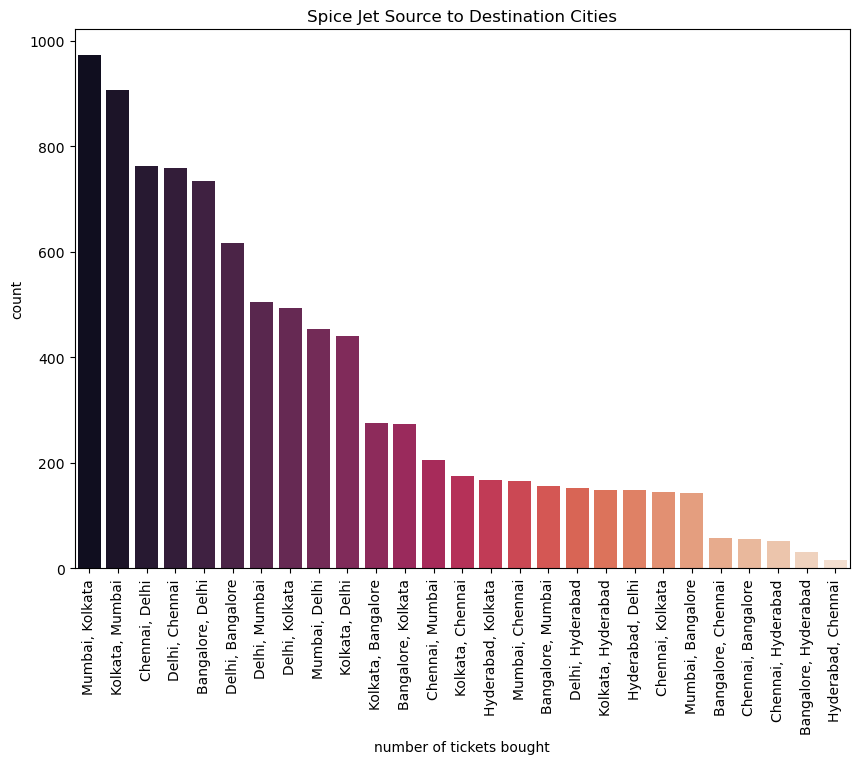

In [32]:
from_to_SpiceJet = from_to_flights[from_to_flights['airline'] == 'SpiceJet']
fig, ax = plt.subplots(figsize = (10, 7))
sns.countplot(x = 'from_to', data = from_to_SpiceJet, order = from_to_SpiceJet['from_to'].value_counts().index, palette = 'rocket')
ax.set_title('Spice Jet Source to Destination Cities')
ax.set_xlabel('number of tickets bought')
plt.xticks(rotation = 90);

### Trujet and StarAir both had the fewest from_to combos.

Trujet does always have 1 stop regardless of the source and destination cities.
They have only 41 tickets in the main dataframe.

Star Air only flighs between two cities, Bangalore and Hyderabad, and they have 61 tickets in the main dataframe.

### Looking at Trujet

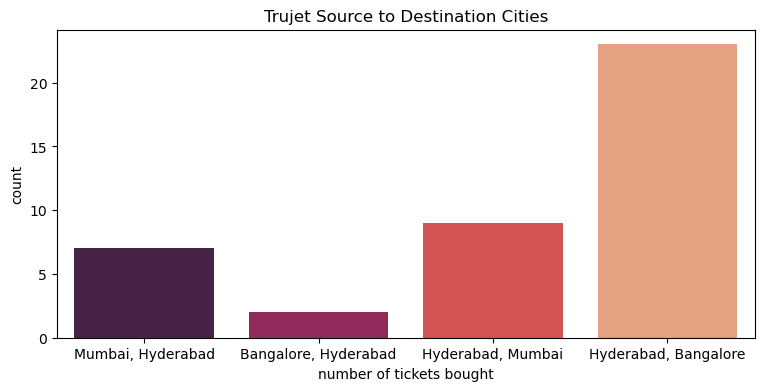

In [33]:
from_to_Trujet = from_to_flights[from_to_flights['airline'] == 'Trujet']
fig, ax = plt.subplots(figsize = (9, 4))
sns.countplot(x = 'from_to', data = from_to_Trujet, palette = 'rocket')
ax.set_title('Trujet Source to Destination Cities')
ax.set_xlabel('number of tickets bought');

### Looking at all Trujet flights in main dataframe

In [34]:
flights[flights['airline'] == 'Trujet']

,date,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,duration_hours,duration_minutes,days_left,price,price_usd
71637,2022-02-22,Trujet,2T-518,Mumbai,11:40:00,1,19:00:00,Hyderabad,economy,7.33,7,20,12,3166,38.72
73768,2022-03-08,Trujet,2T-518,Mumbai,11:40:00,1,19:00:00,Hyderabad,economy,7.33,7,20,26,3166,38.72
73920,2022-03-09,Trujet,2T-518,Mumbai,11:40:00,1,19:00:00,Hyderabad,economy,7.33,7,20,27,3166,38.72
74072,2022-03-10,Trujet,2T-518,Mumbai,11:40:00,1,19:00:00,Hyderabad,economy,7.33,7,20,28,3166,38.72
75139,2022-03-17,Trujet,2T-518,Mumbai,11:40:00,1,19:00:00,Hyderabad,economy,7.33,7,20,35,3166,38.72
76056,2022-03-23,Trujet,2T-518,Mumbai,11:40:00,1,19:00:00,Hyderabad,economy,7.33,7,20,41,3166,38.72
76209,2022-03-24,Trujet,2T-518,Mumbai,11:40:00,1,19:00:00,Hyderabad,economy,7.33,7,20,42,3166,38.72
109729,2022-02-12,Trujet,2T-621,Bangalore,15:55:00,1,18:20:00,Hyderabad,economy,2.42,2,25,2,3289,40.22
109805,2022-02-13,Trujet,2T-621,Bangalore,15:55:00,1,18:20:00,Hyderabad,economy,2.42,2,25,3,3289,40.22
158791,2022-02-14,Trujet,2T-515,Hyderabad,08:40:00,1,11:30:00,Mumbai,economy,2.83,2,50,4,3124,38.20


In [35]:
flights[flights['airline'] == 'Trujet'].shape

(41, 15)

### Looking at Star Air

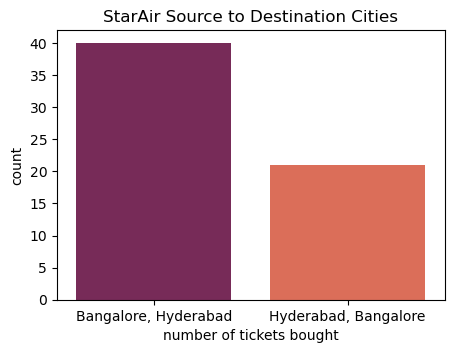

In [36]:
from_to_StarAir = from_to_flights[from_to_flights['airline'] == 'StarAir']
fig, ax = plt.subplots(figsize = (5, 3.5))
sns.countplot(x = 'from_to', data = from_to_StarAir, palette = 'rocket')
ax.set_title('StarAir Source to Destination Cities')
ax.set_xlabel('number of tickets bought');

### Looking at all StarAir flights in main dataframe.


In [37]:
flights[flights['airline'] == 'StarAir']

,date,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,duration_hours,duration_minutes,days_left,price,price_usd
109730,2022-02-12,StarAir,S5-151,Bangalore,07:05:00,0,08:05:00,Hyderabad,economy,1.00,1,0,2,4337,53.03
109764,2022-02-12,StarAir,S5-131,Bangalore,14:35:00,1,19:40:00,Hyderabad,economy,5.08,5,5,2,11382,139.18
110001,2022-02-15,StarAir,S5-151,Bangalore,07:05:00,0,08:05:00,Hyderabad,economy,1.00,1,0,5,4337,53.03
110098,2022-02-15,StarAir,S5-131,Bangalore,14:35:00,1,19:40:00,Hyderabad,economy,5.08,5,5,5,17482,213.78
110430,2022-02-19,StarAir,S5-151,Bangalore,07:05:00,0,08:05:00,Hyderabad,economy,1.00,1,0,9,4337,53.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169904,2022-03-24,StarAir,S5-152,Hyderabad,20:20:00,0,21:25:00,Bangalore,economy,1.08,1,5,42,2115,25.86
169988,2022-03-24,StarAir,S5-150,Hyderabad,08:35:00,1,13:40:00,Bangalore,economy,5.08,5,5,42,9582,117.17
170131,2022-03-26,StarAir,S5-152,Hyderabad,20:20:00,0,21:25:00,Bangalore,economy,1.08,1,5,44,2115,25.86
170514,2022-03-29,StarAir,S5-152,Hyderabad,20:20:00,0,21:25:00,Bangalore,economy,1.08,1,5,47,2115,25.86


### Checking each airline for different class options.


In [38]:
airlines = list(flights['airline'].unique())
airlines

['SpiceJet',
 'AirAsia',
 'Vistara',
 'GO FIRST',
 'Indigo',
 'Air India',
 'Trujet',
 'StarAir']

In [39]:
for i in airlines:
    df = flights[flights['airline'] == i]
    classes = df['class'].unique()
    print(i, ':' , classes)

SpiceJet : ['economy']
AirAsia : ['economy']
Vistara : ['economy' 'business']
GO FIRST : ['economy']
Indigo : ['economy']
Air India : ['economy' 'business']
Trujet : ['economy']
StarAir : ['economy']


### Class options

We can see that only the two most expensive airlines, Vistara and Air India, offer business class tickets. All of the other airlines only offer economy tickets. This would explain the big price jump between the top two airlines (by avg price) and the rest of the airlines. 

### Boxplots for the prices of different from_to combos for both economy and business tickets

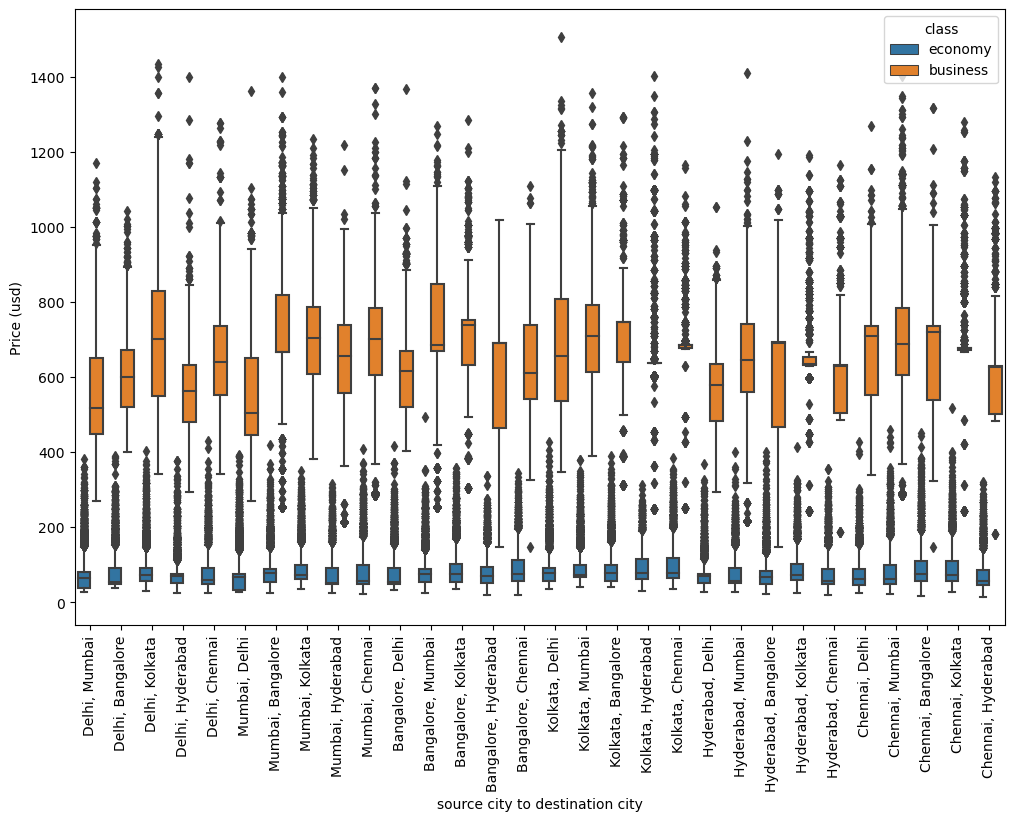

In [40]:
plt.subplots(figsize=(12, 8))
sns.boxplot(x='from_to', y='price_usd', hue='class', data=from_to_flights)
plt.xticks(rotation='vertical')
plt.ylabel('Price (usd)')
plt.xlabel('source city to destination city');

### Exploring the dates

In [41]:
np.min(flights['date'])

Timestamp('2022-02-11 00:00:00')

In [42]:
np.max(flights['date'])

Timestamp('2022-03-31 00:00:00')

It looks like the dates run from Feb, 11, 2022 to March, 31, 2022. From a quick Google, I do not think there are any national holidays for India during that time. 

Let's see which date had the most tickets purchased. 

In [43]:
flights['date'].value_counts().sort_values(ascending = False)

2022-03-07    6633
2022-02-28    6603
2022-03-21    6594
2022-03-14    6586
2022-03-08    6577
2022-03-06    6543
2022-03-01    6541
2022-03-15    6536
2022-03-13    6536
2022-03-22    6535
2022-03-10    6527
2022-03-23    6526
2022-03-20    6513
2022-03-12    6505
2022-03-24    6503
2022-03-02    6502
2022-03-04    6495
2022-03-18    6491
2022-03-03    6483
2022-03-19    6480
2022-03-25    6473
2022-03-26    6440
2022-02-27    6420
2022-02-21    6418
2022-03-16    6412
2022-03-05    6405
2022-02-23    6404
2022-03-11    6398
2022-02-22    6385
2022-03-09    6361
2022-02-24    6353
2022-02-25    6342
2022-03-27    6314
2022-03-17    6296
2022-02-26    6279
2022-03-28    6160
2022-03-31    6157
2022-03-30    6078
2022-03-29    6072
2022-02-20    5823
2022-02-18    5768
2022-02-16    5740
2022-02-17    5703
2022-02-19    5669
2022-02-15    5395
2022-02-14    5079
2022-02-13    4250
2022-02-12    4031
2022-02-11    1927
Name: date, dtype: int64

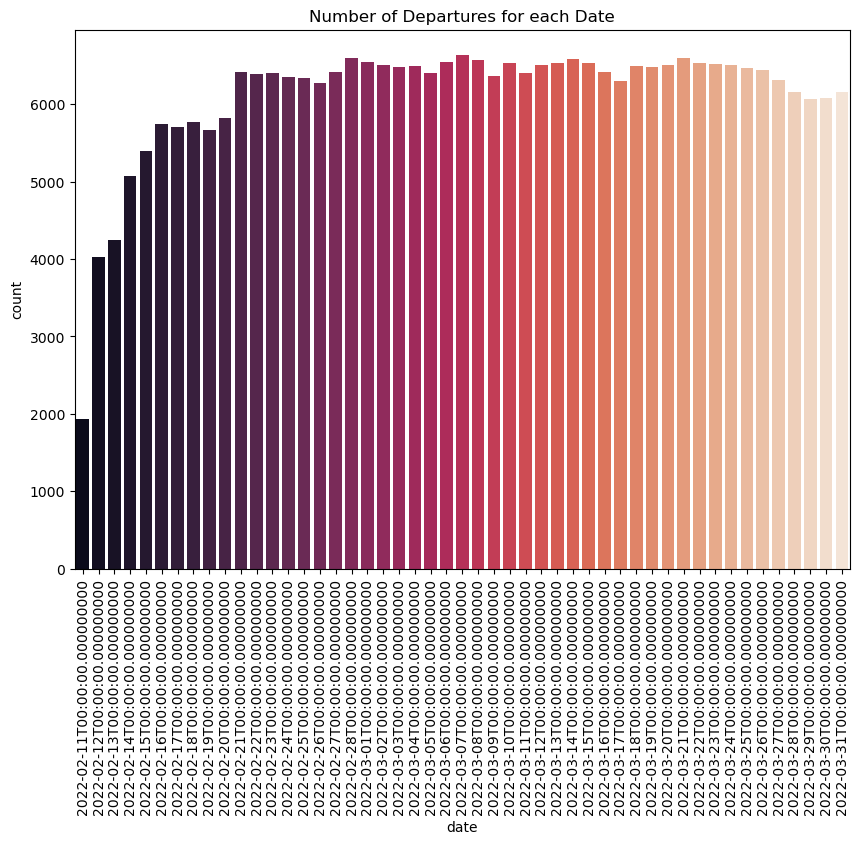

In [44]:
plt.subplots(figsize = (10, 7))
sns.countplot(x='date', data = flights, palette = 'rocket')
plt.title('Number of Departures for each Date')
plt.xticks(rotation=90);

### Weekday vs. Weekend

Next, I create a list of the days of the week for each date in the dataframe and add this as a new column called 'weekday'. Typically we would expect to see more expensive ticket prices on weekends. I would like to see if this holds. 

In [45]:
dates = list(flights['date'])
weekday = []
for i in dates:
    day = i.strftime('%A')
    weekday.append(day)

In [46]:
flights['weekday'] = weekday

In [47]:
flights.head()

,date,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,duration_hours,duration_minutes,days_left,price,price_usd,weekday
0,2022-02-11,SpiceJet,SG-8709,Delhi,18:55:00,0,21:05:00,Mumbai,economy,2.17,2,10,1,5953,72.80,Friday
1,2022-02-11,SpiceJet,SG-8157,Delhi,06:20:00,0,08:40:00,Mumbai,economy,2.33,2,20,1,5953,72.80,Friday
2,2022-02-11,AirAsia,I5-764,Delhi,04:25:00,0,06:35:00,Mumbai,economy,2.17,2,10,1,5956,72.83,Friday
3,2022-02-11,Vistara,UK-995,Delhi,10:20:00,0,12:35:00,Mumbai,economy,2.25,2,15,1,5955,72.82,Friday
4,2022-02-11,Vistara,UK-963,Delhi,08:50:00,0,11:10:00,Mumbai,economy,2.33,2,20,1,5955,72.82,Friday


### Which day of the week occurs most often?

Monday

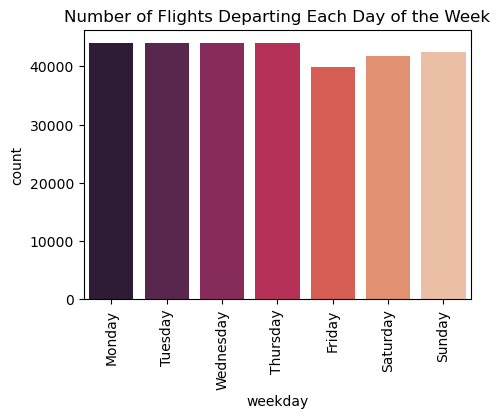

In [48]:
plt.subplots(figsize = (5, 3.5))
sns.countplot(x = 'weekday', data = flights, order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette = 'rocket' )
plt.title('Number of Flights Departing Each Day of the Week')
plt.xticks(rotation=90);

In [49]:
flights['weekday'].value_counts()

Monday       44073
Tuesday      44041
Wednesday    44023
Thursday     44022
Sunday       42399
Saturday     41809
Friday       39894
Name: weekday, dtype: int64

### Looking at the averages grouped by day of the week: 

### Which day has the most expensive avg ticket price?

Saturday


In [50]:
flights.groupby('weekday').mean().sort_values('price_usd', ascending = False)

/var/folders/mw/tgvznz1d6xbdcgxt0rkwdh540000gn/T/ipykernel_24168/290403287.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  flights.groupby('weekday').mean().sort_values('price_usd', ascending = False)


,stops,duration,duration_hours,duration_minutes,days_left,price,price_usd
weekday,,,,,,,
Saturday,0.927121,12.348425,11.906671,26.503145,24.519410,21508.428735,263.013763
Sunday,0.926838,12.490520,12.045661,26.689167,25.269275,21436.225147,262.130818
Friday,0.921191,12.174111,11.733218,26.452725,24.656540,20799.031158,254.338977
Monday,0.921653,12.226567,11.786377,26.409797,25.568284,20708.858076,253.236244
Wednesday,0.922359,12.082003,11.640324,26.498512,27.185721,20645.719987,252.464181
Thursday,0.925310,12.082492,11.639680,26.564877,28.234542,20575.887102,251.610226
Tuesday,0.924979,12.132992,11.690152,26.568175,26.369701,20556.055925,251.367730


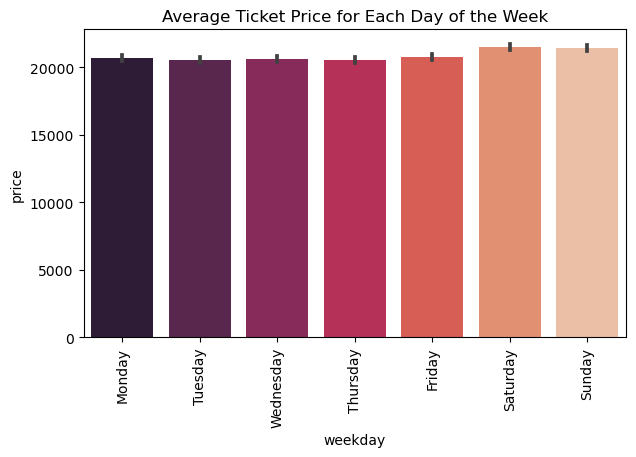

In [51]:
plt.subplots(figsize = (7, 4))
sns.barplot(x = 'weekday', y ='price', data = flights, order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette = 'rocket')
plt.title('Average Ticket Price for Each Day of the Week')
plt.xticks(rotation=90);

### Observations about 'weekday'

The most popular day = Monday. 

The least popular day = Friday. 

The most expensive day = Saturday. 

The cheapest day = Tueday. 

In [52]:
# Saving a csv of the Flights dataframe with columns for price_usd and weekday. 

flights.to_csv('updated_flights_after_EDA.csv')